# Maps and Geocoding

Visualize geospatial information on maps with Lets-Plot!

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



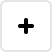
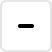
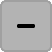
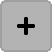
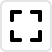
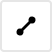
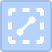

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.geo_data import *
LetsPlot.setup_html()

### Data Preparation

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/midwest.csv')

In [3]:
pop_df = df.groupby('state').poptotal.sum().to_frame('population').reset_index()
pop_df.head(2)

state  population
0    IL    11430602
1    IN     5544159

In [4]:
states = geocode('state', pop_df.state, scope='US').get_boundaries(9)
states.head(2)

state found name                                           geometry
0    IL   Illinois  MULTIPOLYGON (((-89.00848 37.22158, -89.00574 ...
1    IN    Indiana  MULTIPOLYGON (((-86.07513 37.99400, -86.07788 ...

### Polygons and `map_join`

In [5]:
ggplot() + \
    geom_polygon(aes(fill='population'), \
                 data=pop_df, map=states, map_join='state', color='white', \
                 tooltips=layer_tooltips().line('@{found name}')
                                          .format('@population', ',d')
                                          .line('@|@population')) + \
    scale_fill_gradient(low='#fef0d9', high='#b30000')

### Interactive Map

In [6]:
ggplot() + \
    geom_livemap() + \
    geom_map(aes(color='population', fill='population'), \
             data=pop_df, map=states, map_join='state', size=1, alpha=.3) + \
    scale_color_gradient(low='#1a9641', high='#d7191c') + \
    scale_fill_gradient(low='#1a9641', high='#d7191c')

### Custom Theme

In [7]:
tiles = maptiles_lets_plot(url='wss://tiles.datalore.jetbrains.com', theme='dark')
ggplot() + \
    geom_livemap(tiles=tiles) + \
    geom_map(aes(color='population', fill='population'), \
             data=pop_df, map=states, map_join='state', size=1, alpha=.3) + \
    scale_color_gradient(low='#4575b4', high='#d73027') + \
    scale_fill_gradient(low='#4575b4', high='#d73027')

### Custom Tile Server

In [8]:
tiles = maptiles_zxy(
    url='http://a.tile.stamen.com/toner/{z}/{x}/{y}.png',
    attribution='Map tiles by <a href="http://stamen.com">Stamen Design</a>, under <a href="http://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>. Data by <a href="http://openstreetmap.org">OpenStreetMap</a>, under <a href="http://www.openstreetmap.org/copyright">ODbL</a>.',
    max_zoom=10
)
ggplot() + \
    geom_livemap(tiles=tiles) + \
    geom_map(aes(fill='population'), \
             data=pop_df, map=states, map_join='state', \
             color='black', size=1, alpha=.7) + \
    scale_fill_gradient(low='#f7f7f7', high='#252525')